<a href="https://colab.research.google.com/github/zenialexandre/image-processing/blob/main/partial_assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
  Alexandre Zeni

  Replicating the 'Contrast enhancement of microcalcifications
  in mammograms using morphological enhancement and non-flat structuring elements' article.
'''

from google.colab import files

breast_image = files.upload()

Saving breast_image.png to breast_image.png


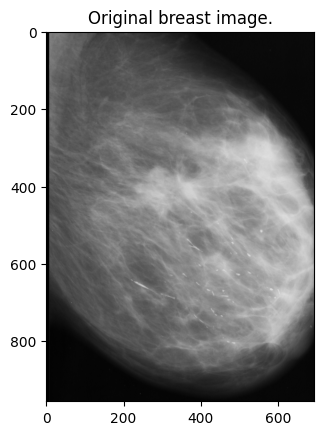

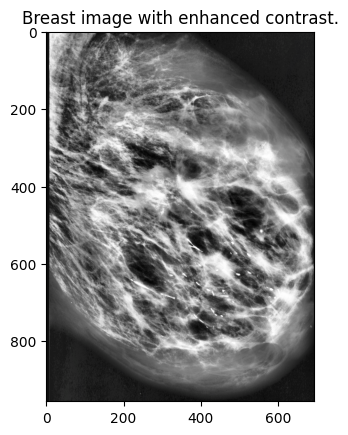

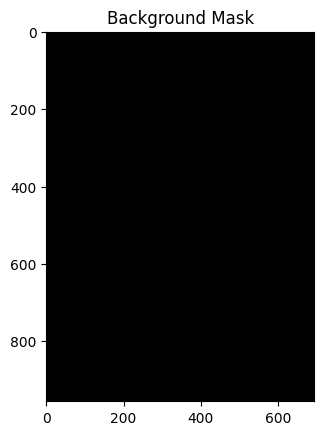

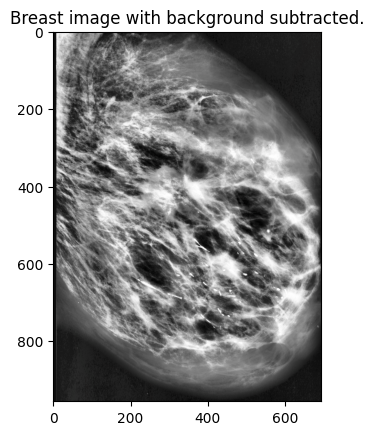

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import cv2
import numpy as np

breast_image_path: str = 'breast_image.png'

def show_original_breast_image(readed_breast_image) -> None:
  plt.imshow(readed_breast_image)
  plt.title('Original breast image.')
  plt.show()

def show_image_with_enhanced_contrast(readed_breast_image) -> None:
  breast_image_lab = cv2.cvtColor(readed_breast_image, cv2.COLOR_BGR2LAB)
  (l_channel, a_channel, b_channel) = cv2.split(breast_image_lab)

  clahe_operator = cv2.createCLAHE(clipLimit=10.0)
  applied_clahe_on_l_channel = clahe_operator.apply(l_channel)

  merged_lab_breast_image = cv2.merge((applied_clahe_on_l_channel, a_channel, b_channel))
  enhanced_breast_image = cv2.cvtColor(merged_lab_breast_image, cv2.COLOR_LAB2BGR)

  plt.imshow(enhanced_breast_image)
  plt.title('Breast image with enhanced contrast.')
  plt.show()
  print('\n')

  show_image_with_background_subtraction(enhanced_breast_image)

def show_image_with_background_subtraction(enhanced_breast_image) -> None:
  background_subtractor = cv2.createBackgroundSubtractorKNN()
  background_mask = background_subtractor.apply(enhanced_breast_image)

  background_mask_morphological = cv2.morphologyEx(background_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  background_mask_morphological = cv2.morphologyEx(background_mask_morphological, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))

  output = cv2.bitwise_and(enhanced_breast_image, enhanced_breast_image, None, mask=background_mask_morphological)

  plt.imshow(background_mask, cmap='gray')
  plt.title('Background Mask')
  plt.show()

  plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
  plt.title('Breast image with background subtracted.')
  plt.show()


if (os.path.exists(breast_image_path)):
  readed_breast_image = cv2.imread(breast_image_path, cv2.IMREAD_COLOR)

  show_original_breast_image(readed_breast_image)
  print('\n')
  show_image_with_enhanced_contrast(readed_breast_image)
